In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from plotting import savefig

plt.style.use("paper")

## Loading the data

In [2]:
data = pd.read_json("../data/231003-COv-data.json")

In [3]:
facet_idx = {
    100: 0,
    111: 1,
    211: 2,
    331: 3,
    410: 4,
    711: 5,
}

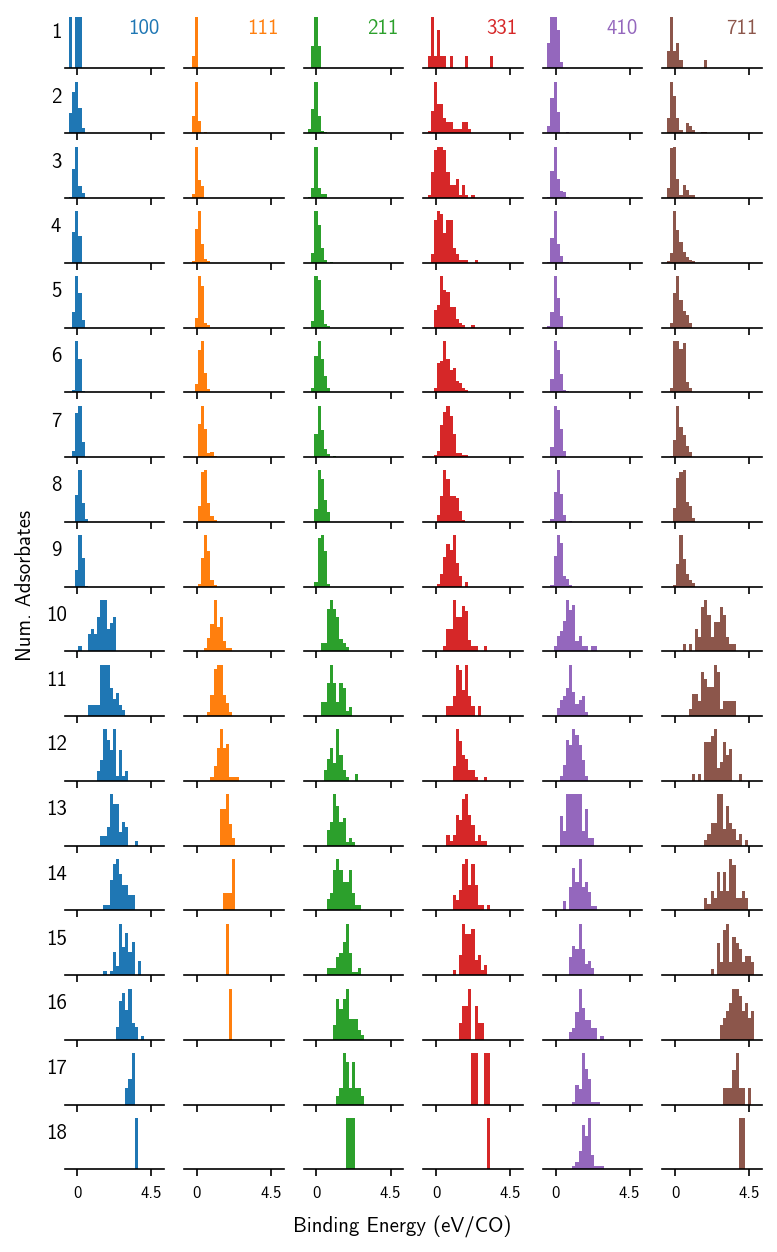

In [4]:
fig, axs = plt.subplots(18, 6, figsize=(6, 10), sharex=True)

bins = np.linspace(-0.5, 5.0, 30)

for (facet, nads), grp in data.groupby(["facet", "num_adsorbates"]):
    i, j = nads - 1, facet_idx[facet]
    ax = axs[i, j]
    ax.hist(grp["unrelax_binding_site"], bins=bins, color=cm.tab10(j))
    
    if i == 0:
        ax.annotate(facet, (0.95, 0.95), xycoords="axes fraction", ha="right", va="top", color=cm.tab10(j))

for ax in axs.reshape(-1):
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
for ax in axs[-1, :]:
    ticks = [0, 4.5]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=8)
#     ax.set_xlabel("E$_b$ (eV/CO)", fontsize=10)
    
for i, ax in enumerate(axs[:, 0], 1):
    ax.set_ylabel(i, rotation=0)

fig.supxlabel("Binding Energy (eV/CO)", y=0.065, fontsize=10)
fig.supylabel("Num. Adsorbates", x=0.07, fontsize=10)

savefig(fig, "01-dset-distributions-splits.pdf")
plt.show()